# ANALIZA EVROPSKIH SMUČIŠČ

<p>V projektni nalogi analiziram evropska smučišča, objavljena na priljubljeni spletni strani Bergfex.</p> 

In [37]:
from IPython.display import display
import pandas as pd

smucisca = pd.read_csv("smucisca.csv")
drzave = pd.read_csv("prebivalci.csv") 

Začnimo z najbolj preprostim, katera smučišča so največja.

<Axes: xlabel='smucisce'>

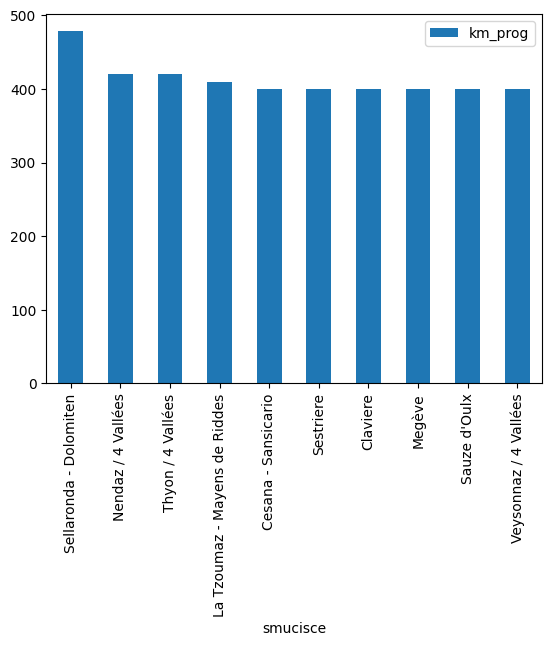

In [38]:
najvecja_smucisca = smucisca.sort_values("km_prog", ascending=False)[:10]
najvecja_smucisca.plot.bar(x="smucisce", y="km_prog")

Najprej poglejmo, koliko km prog ima vsaka od držav, če seštejemo proge vseh njenih smučišč. Ta podatek bomo nato uporabili, da izračunamo km prog na prebivalca in poiščemo najbolj "smučarsko" državo.

In [78]:
df1 = pd.DataFrame(smucisca)
df2 = df1.groupby(["drzava"]).sum("km_prog")
display(df2)

,km_prog
drzava,
AD,303.0
AT,12922.1
BA,136.0
BE,9.1
CH,8631.9
CZ,606.7
DE,1304.2
ES,1152.5
FR,11096.9


<Axes: ylabel='km_prog'>

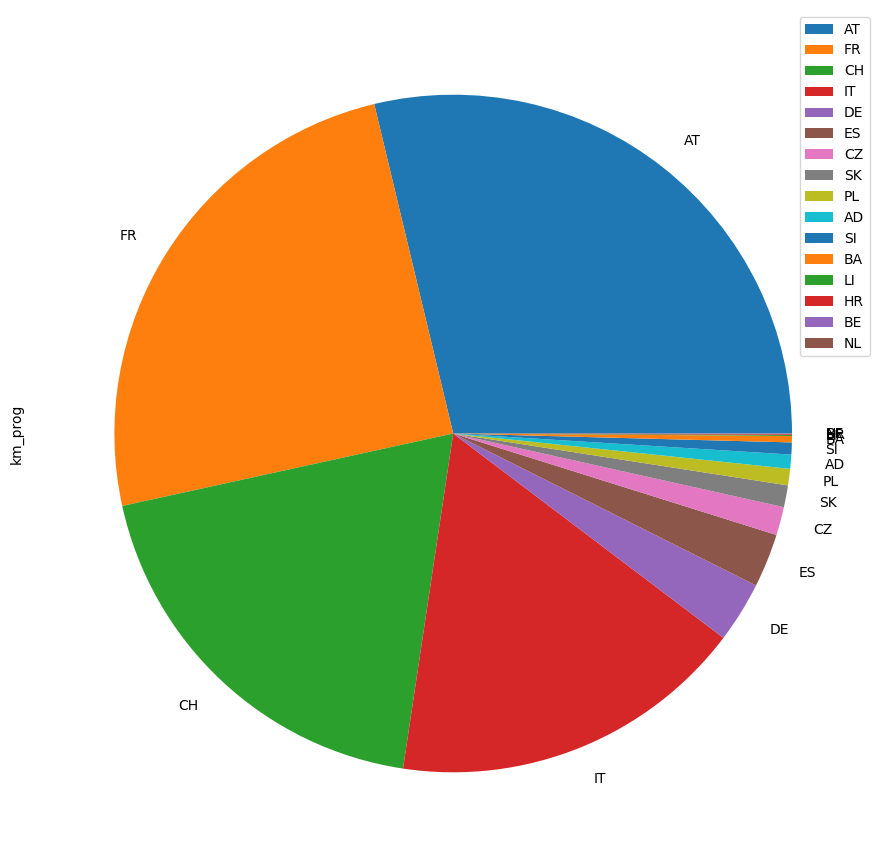

In [85]:
najvec_prog = df2.sort_values(by="km_prog", ascending=False)
najvec_prog.plot.pie(y="km_prog", figsize=(11, 11))

In [86]:
df3 = pd.DataFrame(drzave)
df4 = pd.merge(df3, df2, on="drzava")

df4["m_prog_na_prebivalca"] = (df4["km_prog"] * 1000) / df4["st_prebivalcev"]
df4 = df4.sort_values(by="m_prog_na_prebivalca")
display(df4)

,drzava,st_prebivalcev,km_prog,m_prog_na_prebivalca
8,NL,18346819,4.0,0.000218
9,BE,11758603,9.1,0.000774
3,HR,3848160,16.8,0.004366
10,PL,38140910,352.4,0.009239
1,DE,84075074,1304.2,0.015512
14,ES,47889958,1152.5,0.024066
15,BA,3140096,136.0,0.043311
5,CZ,10609240,606.7,0.057186
13,SK,5474881,467.4,0.085372
2,SI,2117072,257.0,0.121394


Ker je v večini držav razmerje med kilometri prog in številom prebivalcev precej majhno, smo ga v zgornji tabeli prikazali v metrih, namesto v kilometrih. Poglejmo si še vizualizacijo izračunanih podatkov.

<Axes: xlabel='drzava'>

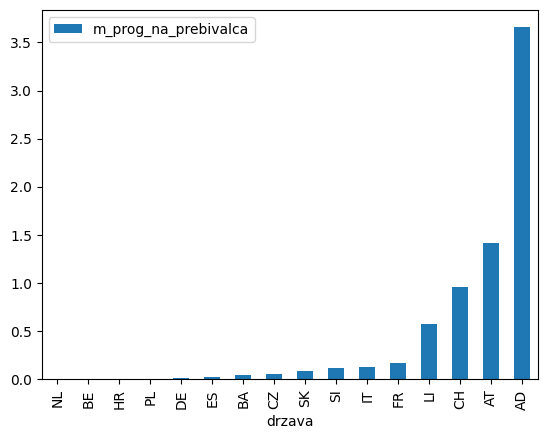

In [87]:
df4.plot.bar(x="drzava", y="m_prog_na_prebivalca")